In [ ]:
import pandas as pd #importing pandas library

In [ ]:
df_ML_final = pd.read_csv('/content/df_ML_final.csv') #reading csv
df_ML_final

,Unnamed: 0,Unnamed: 0_x,Country,Region,Life_expectancy,Alcohol_consumption,BMI,Under_five_deaths,GDP_per_capita,Schooling,total_expenditure,Unnamed: 0_y,Happiness Score,Freedom
0,0,0,Afghanistan,Asia,63.4,0.00,19.1,8.3,556,3.6,8.160000,152,3.575,0.23414
1,1,1,Albania,Rest of Europe,78.0,4.33,58.0,0.0,3953,9.7,6.000000,94,4.959,0.35733
2,2,2,Algeria,Africa,76.1,0.55,59.5,2.4,4178,7.9,4.604000,67,5.605,0.28579
3,3,3,Angola,Africa,59.4,6.53,23.3,9.8,3128,5.0,3.919333,136,4.033,0.10384
4,4,5,Argentina,South America,76.1,8.49,62.8,0.9,13789,9.8,6.912667,29,6.574,0.44974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,129,170,Uruguay,South America,77.4,6.00,64.0,0.0,15614,8.7,8.750000,31,6.485,0.60362
130,130,171,Uzbekistan,Asia,70.9,2.59,44.7,1.7,2754,11.4,5.638000,43,6.003,0.65821
131,131,174,Vietnam,Asia,75.1,2.98,17.5,3.5,2582,8.0,5.977333,74,5.360,0.59444
132,132,176,Zambia,Africa,61.7,3.50,23.4,4.0,1338,6.9,5.824000,84,5.129,0.48827


In [ ]:
df_ML_final.drop(["Unnamed: 0_x"],axis = 1,inplace = True)

In [ ]:
df_ML_final.drop(["Unnamed: 0_y"],axis = 1,inplace = True)

In [ ]:
X = df_ML_final[['Life_expectancy',  #defining our X features
                 'GDP_per_capita',
                 'Schooling']]
y = df_ML_final['Happiness Score']   #defining y target
print(X.shape)

(134, 3)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=12) #Splitting the data into two groups : Train & Test

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(107, 3) (107,)
(27, 3) (27,)


In [ ]:
from sklearn.preprocessing import RobustScaler #RobustScaler here to handle outliers
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) #Care about overfitting

In [ ]:
X_final_train = pd.DataFrame(X_train_scaled,columns = scaler.feature_names_in_) #Getting features names on scaled features

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_final_train, y_train)
reg #training the model

LinearRegression()

In [ ]:
reg.intercept_ #intercept of the model

5.348774097188501

In [ ]:
reg.score(X_test_scaled,y_test) # R-squared of the model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.7268744051946514

In [ ]:
coef_series = pd.Series(data=reg.coef_,index=reg.feature_names_in_) #coef of features (the "weight" on regression slope)
print(coef_series)

Life_expectancy    0.555082
GDP_per_capita     0.343435
Schooling          0.378979
dtype: float64


In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_scaled = sm.add_constant(X_train_scaled) # importing statsmodels library that gives us precise regression results like f-stat and Adj.R-square
model = sm.OLS(y_train, X_train_scaled)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     68.27
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           2.18e-24
Time:                        14:33:26   Log-Likelihood:                -106.36
No. Observations:                 107   AIC:                             220.7
Df Residuals:                     103   BIC:                             231.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3488      0.085     62.915      0.0

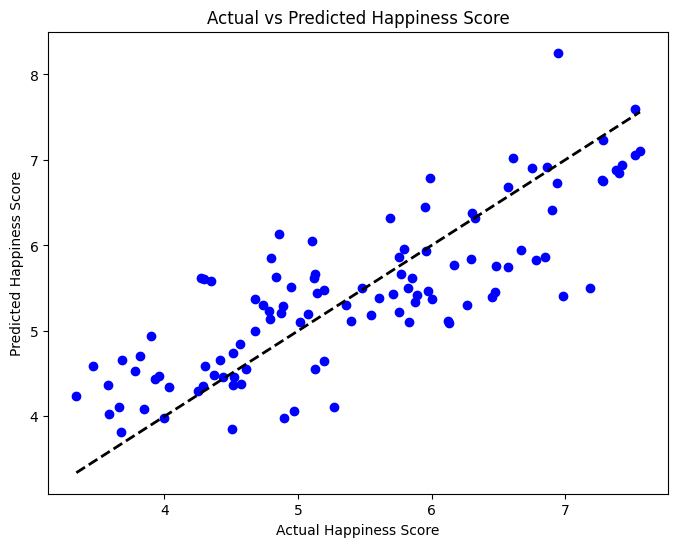

In [ ]:
import matplotlib.pyplot as plt


predicted_values = results.predict(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_train, predicted_values, color='blue')  # scatter plot of result predict and real result
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # same scale for both axis with a diagonal line in order to see the model "predictive power"
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Score')
plt.show()
